In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
! pip install wordcloud

In [5]:
# Data Analysis libraries
import numpy as np
import pandas as pd
import string
import os


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# NLP Modules
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


# SkLearn for ML Model
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [6]:
dataset = pd.read_csv('spam.csv', sep=",",encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
dataset.info() #no nulls present in v1 & v2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
round((50/5572)*100,3) 

0.897

In [10]:
# Dropping these unamed cols
dataset = dataset.drop(labels = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis =1)

In [11]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
dataset.columns = ['label','message'] #renamed the cols v1 & v2

In [13]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
# two unique labels - ham & spam
# ham has 4825 records out of 5572 (85%)

In [17]:
dataset.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [18]:
## 4825 ham records
## 747 spam records
## Sorry...... most frequent in ham with 30 records. 

In [19]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# adding length of messages
dataset['length'] = dataset['message'].apply(len)
dataset.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
dataset.groupby('label').describe().T

label                 ham        spam
length count  4825.000000  747.000000
       mean     71.023627  138.866131
       std      58.016023   29.183082
       min       2.000000   13.000000
       25%      33.000000  132.500000
       50%      52.000000  149.000000
       75%      92.000000  157.000000
       max     910.000000  224.000000

In [22]:
# there are a lot of spam messages here and they are longer in length

In [23]:
pd.options.display.max_colwidth = 1000 #to display the msg full, not truncated

In [24]:
## Top 5 ham/ spam messages
dataset['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a message,12
2,Ok...,10
3,"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4


# Visualization

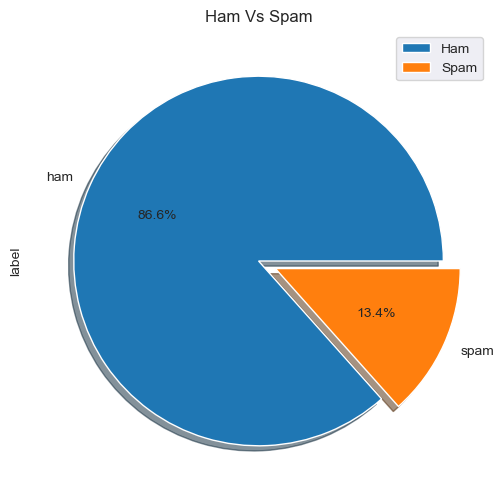

In [25]:
dataset['label'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
plt.title('Ham Vs Spam')
plt.legend(['Ham','Spam'])
plt.show()

Text(0, 0.5, 'Frequency')

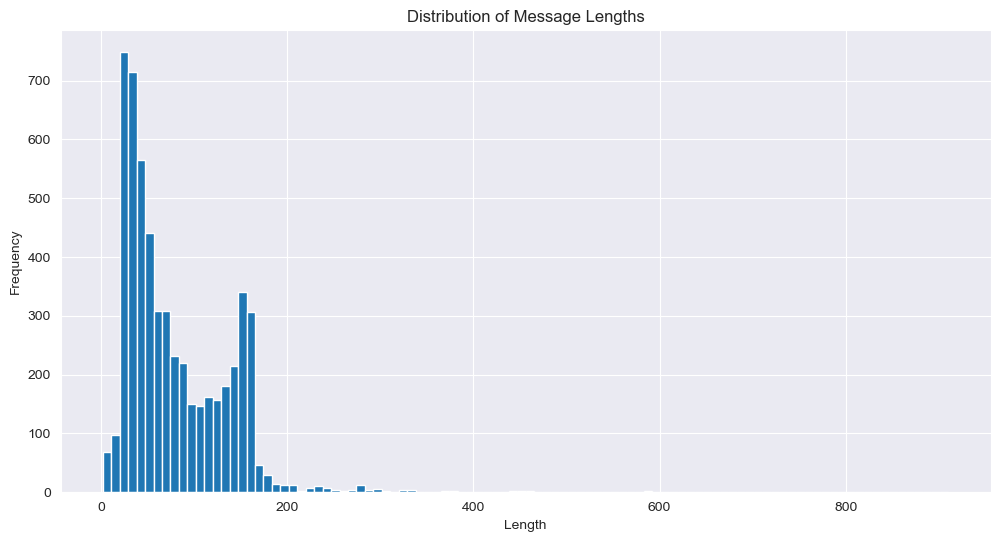

In [26]:
plt.figure(figsize = (12,6))
dataset['length'].plot(bins=100, kind ='hist')
plt.title('Distribution of Message Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

In [27]:
dataset[dataset['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

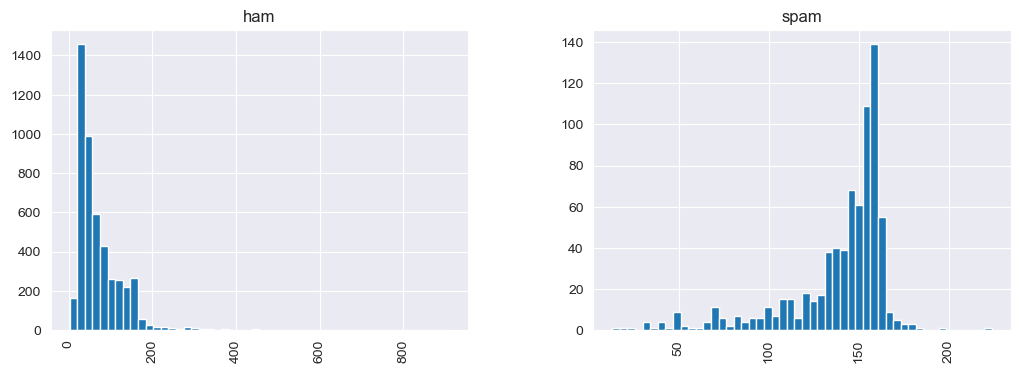

In [28]:
dataset.hist(column = 'length', by ='label', bins = 50, figsize = (12,4))

# Text Processing

In [29]:
# punctuations check
# remove stopwords. 
def preprocess_text(mess):
    # Removing punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Converting text to lowercase and removing stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
spam_message = dataset[dataset['label'] == 'spam']['message']
ham_message = dataset[dataset['label'] == 'ham']['message']

### Apply text process on collections individually

In [31]:
spam_words = preprocess_text(spam_message) 

In [32]:
spam_words[:10]

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts']

In [33]:
ham_words = preprocess_text(ham_message) 

In [34]:
ham_words[:10]

['go',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

### Word Cloud

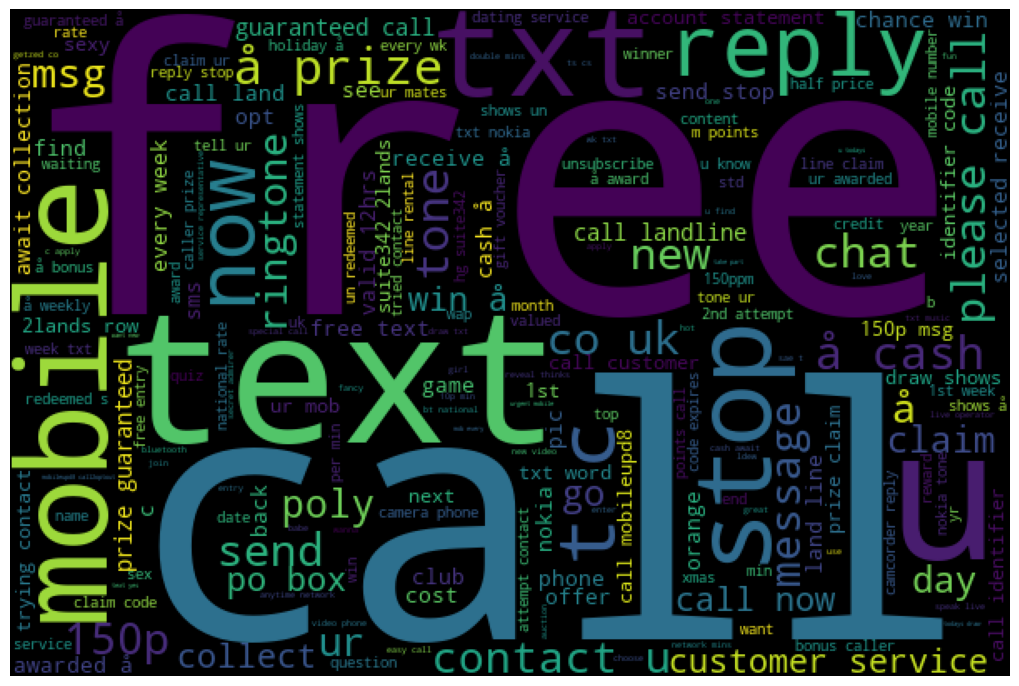

In [35]:
spam_word_cloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))

plt.figure(figsize = (10,8))
plt.imshow(spam_word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [36]:
print(pd.Series(spam_words).value_counts().head(10))

call      331
2         168
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
&          98
u          98
dtype: int64


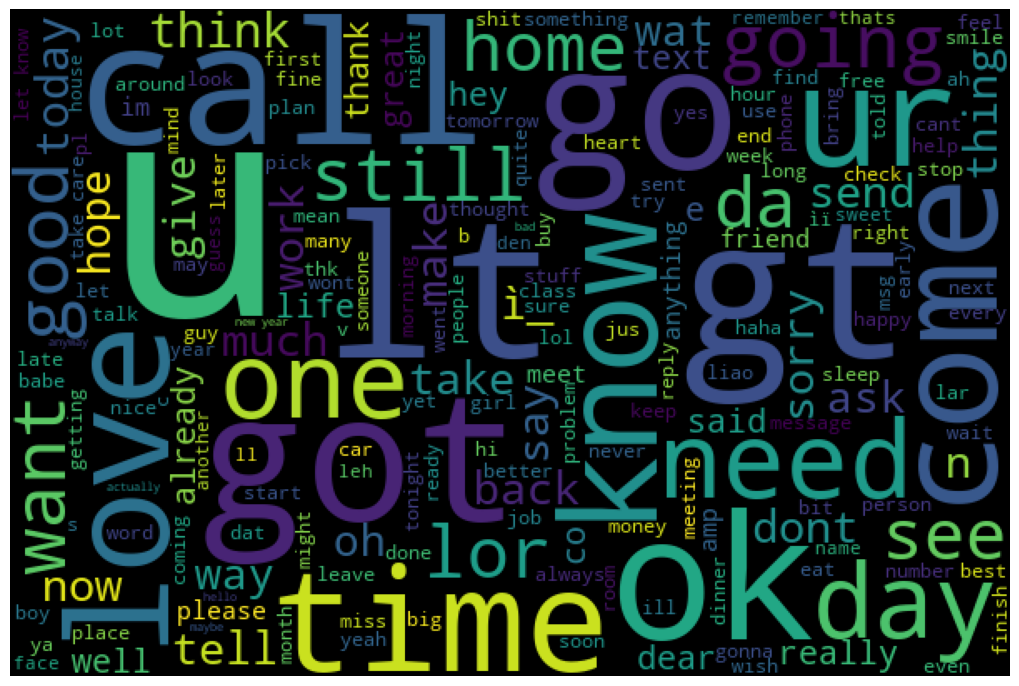

In [37]:
ham_word_cloud = WordCloud(width = 600, height = 400).generate(' '.join(ham_words))
plt.figure(figsize = (10,8))
plt.imshow(ham_word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Transform the original DF

In [38]:
dataset['message'] = dataset['message'].apply(preprocess_text)

In [39]:
dataset.head()

,label,message,length
0,ham,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",111
1,ham,"[ok, lar, joking, wif, u, oni]",29
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",155
3,ham,"[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"[nah, dont, think, goes, usf, lives, around, though]",61


## Vectorizations

In [42]:
# Convert lists of words back to raw text
raw_text_messages = dataset['message'].apply(lambda word_list: ' '.join(word_list))

# Use CountVectorizer on the raw text
vectorizer = CountVectorizer()
bow_vectorizer = vectorizer.fit(raw_text_messages)
print("Total number of words :", len(vectorizer.vocabulary_))

Total number of words : 9376


In [44]:
# Convert individual lists of words back to raw text
raw_text_message5 = ' '.join(dataset['message'][4])

# Use CountVectorizer to transform the raw text
bow5 = bow_vectorizer.transform([raw_text_message5])
print(bow5)
print(bow5.shape)

  (0, 1305)	1
  (0, 2902)	1
  (0, 3778)	1
  (0, 5010)	1
  (0, 5637)	1
  (0, 8227)	1
  (0, 8246)	1
  (0, 8667)	1
(1, 9376)


In [46]:
# ## Transform DF
# Convert entire DataFrame column of lists of words back to raw text
raw_text_messages = dataset['message'].apply(lambda word_list: ' '.join(word_list))

# Use CountVectorizer to transform the raw text
message_bow = bow_vectorizer.transform(raw_text_messages)
print('Shape of my sparse matrix', message_bow.shape)

Shape of my sparse matrix (5572, 9376)


In [47]:
# out of 5572 - 9736 unique words were found

In [48]:
# TF-IDF VEctorrizer
from sklearn.feature_extraction.text import TfidfTransformer

bow_vectorizer_tf = TfidfTransformer().fit(message_bow) 

In [49]:
tfidf5 = bow_vectorizer_tf.transform(bow5)
print(tfidf5)

  (0, 8667)	0.4000611457714059
  (0, 8246)	0.35462891367407595
  (0, 8227)	0.2665748147939407
  (0, 5637)	0.40493594386802356
  (0, 5010)	0.44910913790937335
  (0, 3778)	0.35674330934716636
  (0, 2902)	0.23016324066220836
  (0, 1305)	0.31179198007951625


In [50]:
message_tfidf = bow_vectorizer_tf.transform(message_bow)

In [51]:
print(message_tfidf.shape)

(5572, 9376)


In [53]:
# Convert entire DataFrame column of lists of words back to raw text
raw_text_messages = dataset['message'].apply(lambda word_list: ' '.join(word_list))

# Use TfidfVectorizer to transform the raw text
vec = TfidfVectorizer(stop_words='english')
features = vec.fit_transform(raw_text_messages)
print(features.shape)

(5572, 9213)


In [54]:
# Machine Learning Model will be applied 

## Train test split
# 100 rows -> 80 rows for training & 20 rows test
msg_train,msg_test,label_train,label_test = train_test_split(message_tfidf, dataset['label'], test_size = 0.2)

print(msg_train.shape)
print(msg_test.shape)

(4457, 9376)
(1115, 9376)


In [55]:
## MAchine learning algo import 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

spam_filter_module = clf.fit(msg_train,label_train)

In [56]:
predict_train = spam_filter_module.predict(msg_train)

In [57]:
print(metrics.classification_report(label_train,predict_train))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3846
        spam       1.00      0.85      0.92       611

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457



In [58]:
predict_test = spam_filter_module.predict(msg_test)
print(metrics.classification_report(label_test,predict_test))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       979
        spam       1.00      0.70      0.82       136

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



It seems that the Multinomial Naive Bayes classifier has been trained and tested on the TF-IDF transformed data. The classification reports show the precision, recall, and F1-score for both the training and testing sets.

From the classification reports, we can conclude the following:

The model performs well on the training set with high precision, recall, and F1-scores for both 'ham' and 'spam' classes.
On the testing set, the model still maintains high precision for 'ham' messages but has a lower recall and F1-score for 'spam' messages. This indicates that while the model correctly identifies most non-spam messages, it struggles more with accurately classifying spam messages.
In summary, the model performs very well in identifying non-spam messages but may need further refinement to improve its performance in correctly identifying spam messages.